# Computer Vision - 101

In this notebook, we will study some of the core concepts behind computer vision. The tools we're going to use are based on Opencv-library. 

The first half of this study is about basics on image processing. 

In [23]:
#Loading the tools
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

print("Libraries ok!")

Libraries ok!


## Basics on digital images
As you may know, images are an matrix of pixels. Each pixel value represents the intensity in a scale 0-263 for a 8-bit image.
RGB, colored, images are essencialy three matrices, each for a color layer,i.e one matrix for Red, one for Green, one for Blue. 

Depending on the tool used, the order of the matrices may be interpreted as BGR, i.e. the first channel is the Blue, then comes the Green and later the Red. This is the case for Opencv. What this means is that in some cases the channel orders may have to be treated. This is particularly true when we try to plot an RGB image using the method `plt.imshow`, but the image was loaded with openCV using `cv2.imread` . 

Finally, it is commom in image processing, treating the images as a single layer, i.e. gray image, for that, there is a simple way to merge all three channels (RGB) as a single mono-chromatic layer `cv2.cvtColor()` is a versityle method for converting either BGR-images into gray-scale images or  into RGB-images.

In [2]:
#Treating the file path
cwd = os.getcwd()
my_image = "images\lenna.png"
image_path = os.path.join(cwd,my_image)
print("Image path is: " + image_path)

#Loading the image in the program
if os.path.isfile(image_path):
    image = cv.imread(image_path)
#Converting from BGR to grayscale
    image_gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    image_rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)
    print("Image loaded!")
else:
    print("File does not exist")



Image path is: C:\Users\hugo.medeiros\OneDrive\Academico\Udacity\computer-vision-tutorial\images\lenna.png
Image loaded!


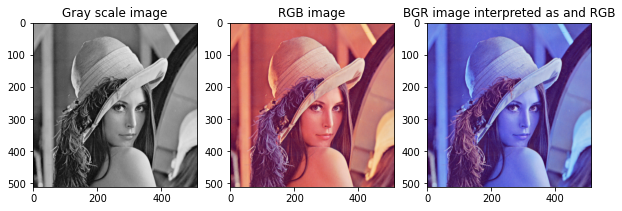

In [3]:
#Displaying the image
plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(image_gray,cmap='gray'),plt.title("Gray scale image")
plt.subplot(132),plt.imshow(image_rgb),plt.title("RGB image")
plt.subplot(133),plt.imshow(image),plt.title("BGR image interpreted as and RGB")
plt.show()

As you may see in the third image, when the channel order is not treated, the image is still colorfull, however its colors are particularly odd.

### Croping an Image
As you may guest, given that an image is this simply an array of numbers, which represents a brightness intesity, if one were to crop the image, he/she would just index the matrix to crop part of the image he/she want.

**Note: When dealing with matrices in python, beware of copying them with the `.copy()` methods, otherwise the original image will be altered**

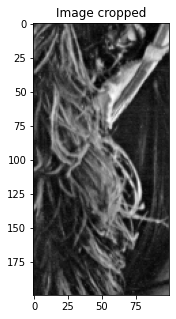

In [7]:
## Croping an image
image_crop = image_gray[300:500,100:200].copy()

plt.figure(figsize=(5,5))
plt.imshow(image_crop,cmap='gray'),plt.title("Image cropped")
plt.show()

### Some usefull methods from openCV
Here are some miscelenious methods that I have come across, and would be nice to keep them.

# Image Convolution/Image Correlation - Kernel

The main fundamental operations applied to images are either **correlation or convolution**. Both operations consist of sliding a smaller matrix across the image to be transformed. As the matrix, also known as **Kernel**, slides trought, a new pixel is computed based on some matrix multiplication. 

![Correlation vs Convolution](images/correlation-vs-convolution.png)


Deppeding on the kernel one is using, for example a simetric kernel such as a gaussian, flipping the kernel won't cause any difference. However, when dealing with assymetric kernel operations, as in *image derivatives*, this flipping effect matters.

### Normalized Correlation

The simplest form of pattern detection is via a *template matching* technique. 

Imagine you want to identify which portion of the image matches the most with some template. If we *convolve the tamplate accross the large image* we would get a **correlation map** which indicates which portion of the image is the most correlated with the template. 

Original Image size: (512, 512)
Template size: (200, 100)
Correlation Map size: (313, 413)


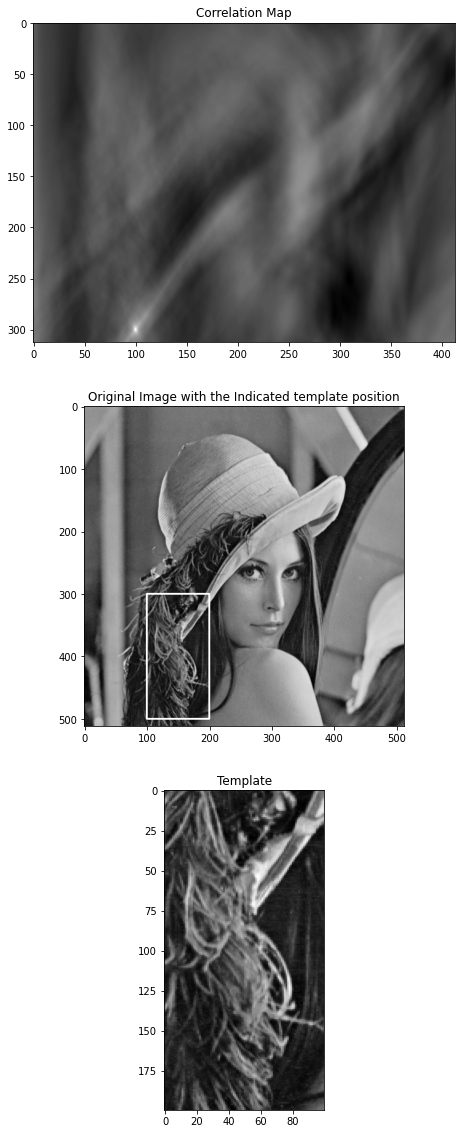

In [19]:
## Template matching

#Copying the variables
img = image_gray.copy()
template = image_crop.copy()
w,h = template.shape

#Convolving the template to the image and generating a correlation map
res = cv.matchTemplate(img,image_crop,cv.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

#Drawing a rectangle in the original image, just for visualization
top_left = max_loc
bottom_right = (top_left[0]+h,top_left[1]+w)
cv.rectangle(img, top_left, bottom_right, (255,0,0), 2)

#Image shapes
print("Original Image size: " + str(img.shape))
print("Template size: " + str(template.shape))
print("Correlation Map size: " + str(res.shape))

#Displaying the results
plt.figure(figsize=(20,20))
plt.subplot(311),plt.imshow(res,cmap = 'gray'),plt.title("Correlation Map")
plt.subplot(312),plt.imshow(img,cmap = 'gray'),plt.title("Original Image with the Indicated template position")
plt.subplot(313),plt.imshow(template,cmap = 'gray'),plt.title("Template")
plt.show()

In the example above, the **correlation map is expected to have a smaller dimension than the original image**. This happens because of the edge effect.

![correlation-map](images/correlation-map.png)

## Edge Detection
The fundamental principle behind edge detection is that edges are consequence of a rapid variance in intesity levels. Consider the following example in which we are 'slicing' one row of an image.

Original Image size: (50, 60)


(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x1d1007bac70>])

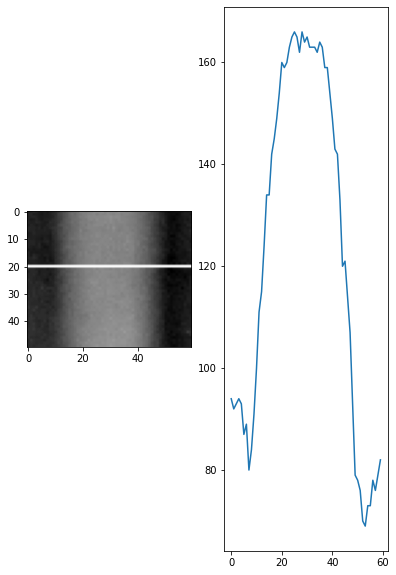

In [28]:
#Slicing a small portion from the image
image_portion = image_gray[100:150,15:75].copy()

#Dimensions
print("Original Image size: "+str(image_portion.shape));

#Reading the values from row number 20
x = np.arange(0,60,1)
y = image_portion[20,:].copy()

#Drawing a line for indication
cv.line(image_portion,(0,20),(75,20),(255,0,0))


#Ploting the views
plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(image_portion,cmap="gray")
plt.subplot(132),plt.plot(x,y)